In [1]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user,password,host

In [2]:
def get_zillow(user=user,password=password,host=host):
    """
    This function wrangles data from a cached CSV or SQL database, drops unneeded columns and null
    values, and returns a cleaned dataframe of Zillow property data.
    
    :param user: The username for accessing the MySQL database
    :param password: Please make sure to keep your password secure and not share it with anyone
    :param host: The host parameter is the address of the server where the MySQL database is hosted
    :return: a pandas DataFrame containing cleaned and wrangled data from the Zillow database for single
    family residential properties. The DataFrame includes columns for bedroom count, bathroom count,
    calculated finished square footage, tax value in dollars, year built, tax amount, and FIPS code. The
    function drops unneeded columns and null values before returning the DataFrame.
    """
    # name of cached csv
    filename = 'zillow.csv'
    # if cached data exist
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    # wrangle from sql db if not cached
    else:
        # read sql query into df
        # 261 is single family residential id
        df = pd.read_sql('''select yearbuilt
                                    , bedroomcnt
                                    , bathroomcnt
                                    , calculatedfinishedsquarefeet
                                    , taxvaluedollarcnt
                                    , taxamount
                                    , fips 
                            from properties_2017
                            where propertylandusetypeid = 261'''
                            , f'mysql+pymysql://{user}:{password}@{host}/zillow')
        # cache data locally
        df.to_csv(filename, index=False)
    # nulls account for less than 1% so dropping
    df = df.dropna()
    # rename columns
    df = df.rename(columns=({'yearbuilt':'year'
                            ,'bedroomcnt':'beds'
                            ,'bathroomcnt':'baths'
                            ,'calculatedfinishedsquarefeet':'area'
                            ,'taxvaluedollarcnt':'tax_value'
                            ,'taxamount':'prop_tax'
                            ,'fips':'county'}))
    # map county to fips
    df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
    # make int
    ints = ['year','beds','area','tax_value']
    for i in ints:
        df[i] = df[i].astype(int)
    return df

In [3]:
# get initial data
df = get_zillow()

In [4]:
# check size
df.shape

(2140235, 7)

In [5]:
# look at value ranges
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
beds,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
baths,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
area,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
tax_value,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
prop_tax,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87


In [6]:
# look at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   year       int64  
 1   beds       int64  
 2   baths      float64
 3   area       int64  
 4   tax_value  int64  
 5   prop_tax   float64
 6   county     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 114.3+ MB


In [7]:
# check and count nulls
df.isnull().sum()

year         0
beds         0
baths        0
area         0
tax_value    0
prop_tax     0
county       0
dtype: int64

In [8]:
# what if we drop, what is the size
df1 = df.dropna()
df1.shape

(2140235, 7)

In [9]:
# how much does it account for
df1.shape[0] / df.shape[0]

1.0

In [10]:
# less than 1% so dropping
df = df.dropna()

In [11]:
import wrangle

In [12]:
df2 = wrangle.wrangle_zillow()
df2

,year,beds,baths,area,tax_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
3,1972,0,0.0,1200,5328,91.60,LA
4,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   year       int64  
 1   beds       int64  
 2   baths      float64
 3   area       int64  
 4   tax_value  int64  
 5   prop_tax   float64
 6   county     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 114.3+ MB


In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
beds,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
baths,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
area,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
tax_value,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
prop_tax,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87


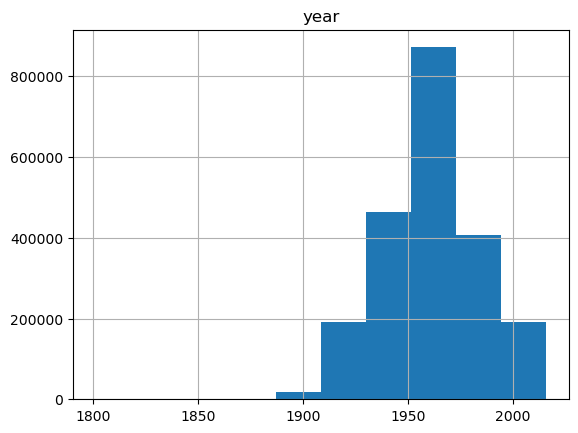

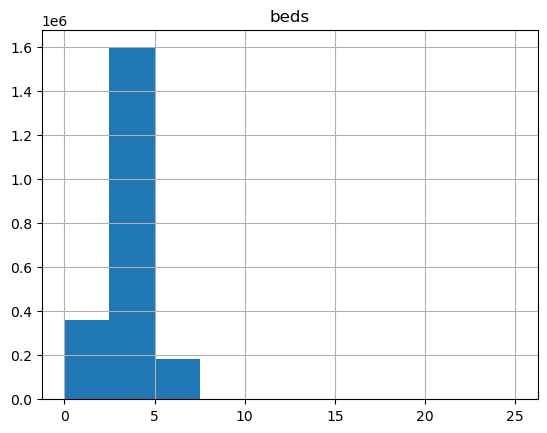

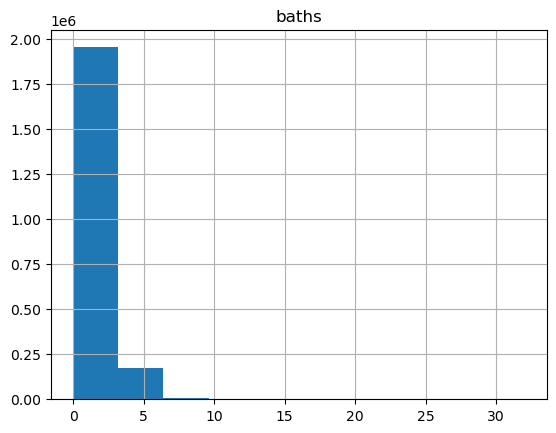

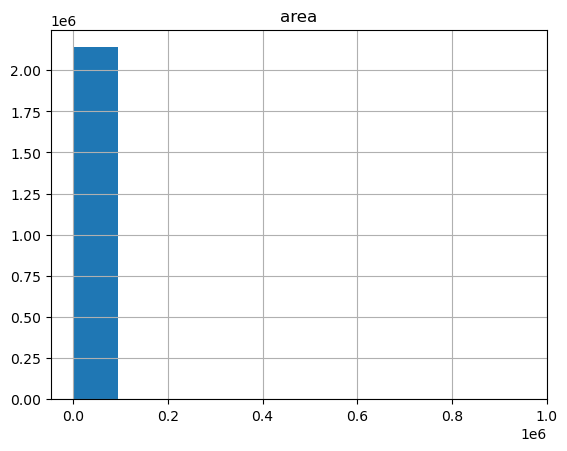

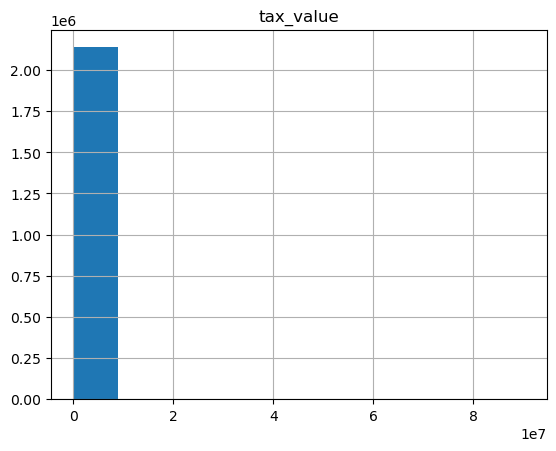

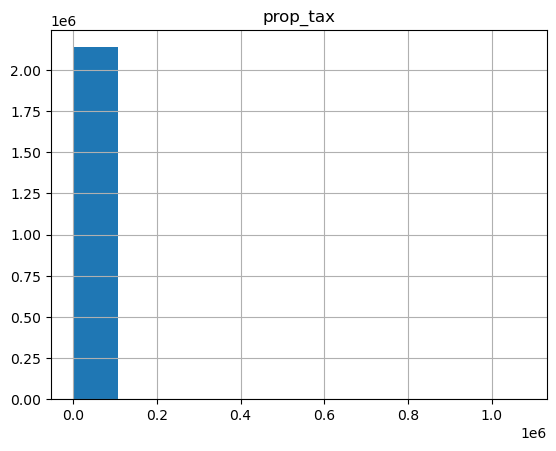

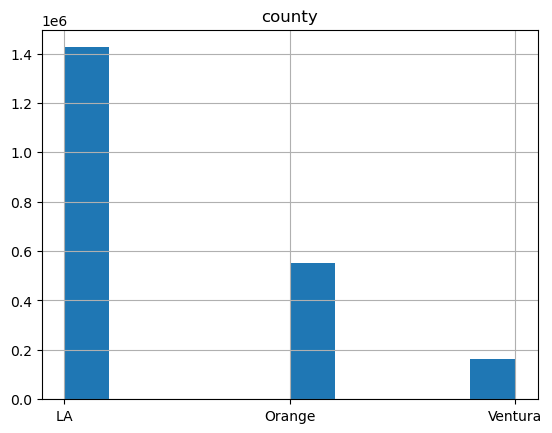

In [16]:
# List of columns
cols = ['year', 'beds', 'baths', 'area','tax_value','prop_tax','county']

for col in cols:
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df2[col].hist()
    plt.show()

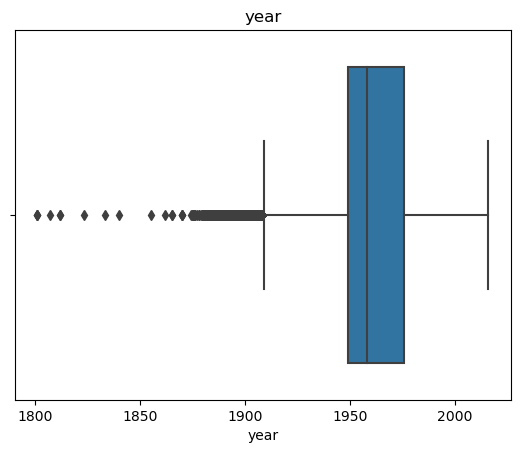

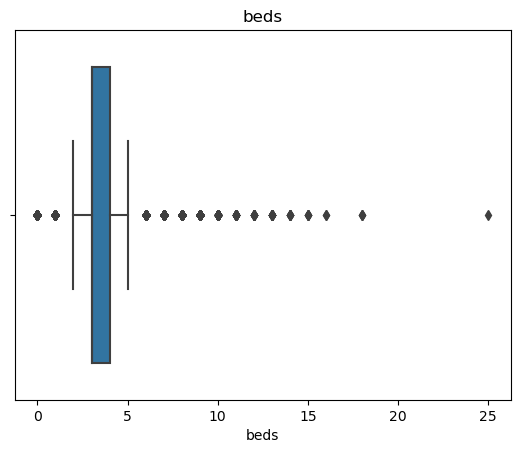

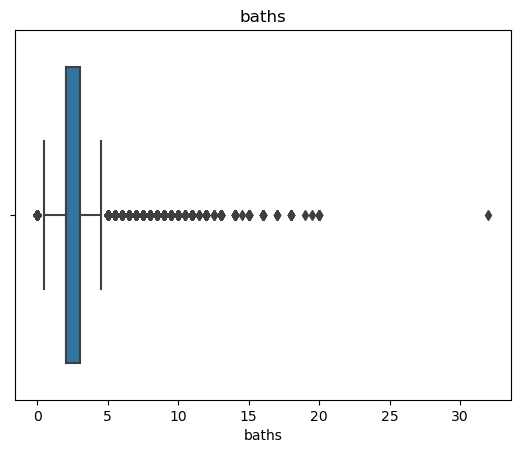

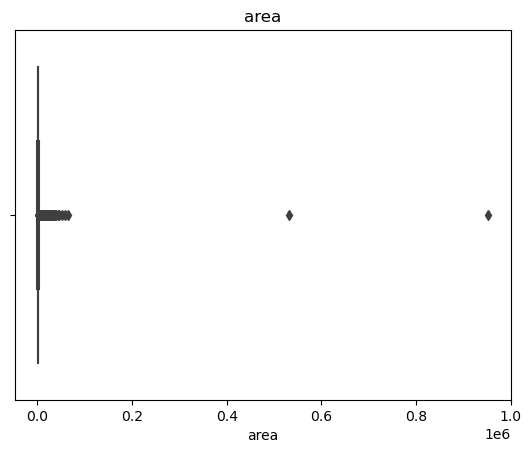

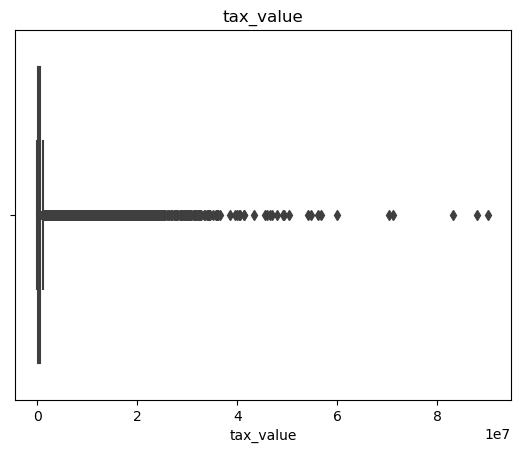

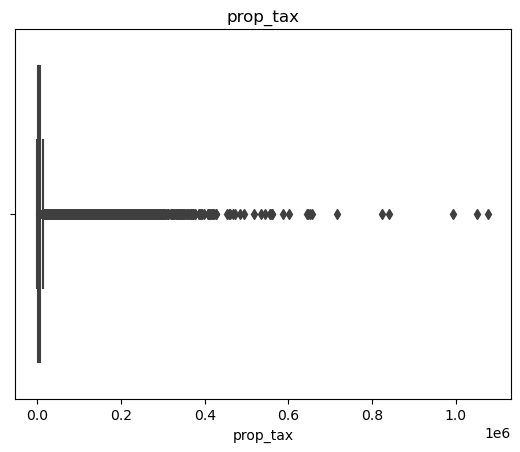

In [17]:
cols = ['year', 'beds', 'baths', 'area','tax_value','prop_tax']

for col in cols:
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    sns.boxplot(data=df2, x=col)
    plt.show()

In [22]:
df2.area.value_counts(bins=100).sort_index()

(-951.576, 9526.75]      2138184
(9526.75, 19052.5]          1937
(19052.5, 28578.25]           88
(28578.25, 38104.0]           18
(38104.0, 47629.75]            3
                          ...   
(904947.25, 914473.0]          0
(914473.0, 923998.75]          0
(923998.75, 933524.5]          0
(933524.5, 943050.25]          0
(943050.25, 952576.0]          1
Name: area, Length: 100, dtype: int64

In [23]:
df2.area.mean()

1863.1939702883094

In [24]:
df3 = df2[df2.area < 25000]

In [25]:
df3

,year,beds,baths,area,tax_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
3,1972,0,0.0,1200,5328,91.60,LA
4,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


In [32]:
df4 = df3[df3.tax_value < df3.tax_value.quantile(.95)]

In [33]:
df4

,year,beds,baths,area,tax_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
3,1972,0,0.0,1200,5328,91.60,LA
4,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


year


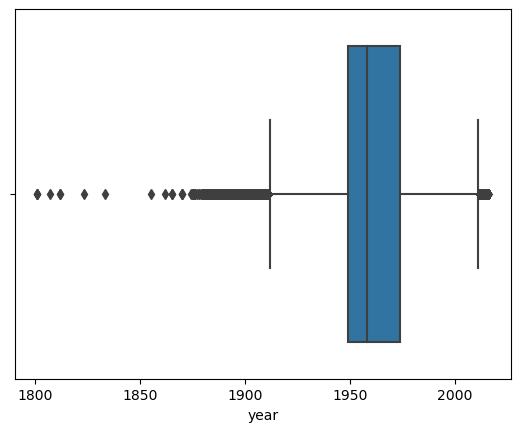

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    2386
2013    3210
2014    3319
2015    2638
2016      74
Name: year, Length: 152, dtype: int64

beds


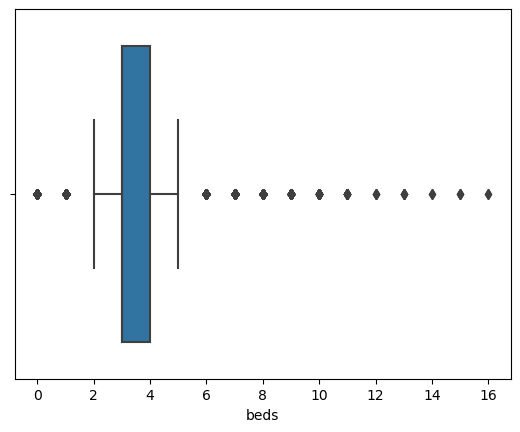

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: beds, dtype: int64

baths


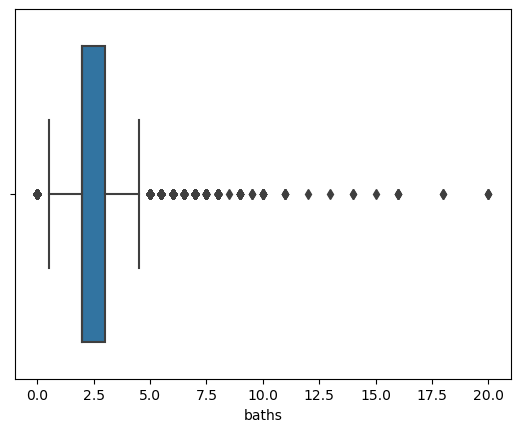

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: baths, dtype: int64

area


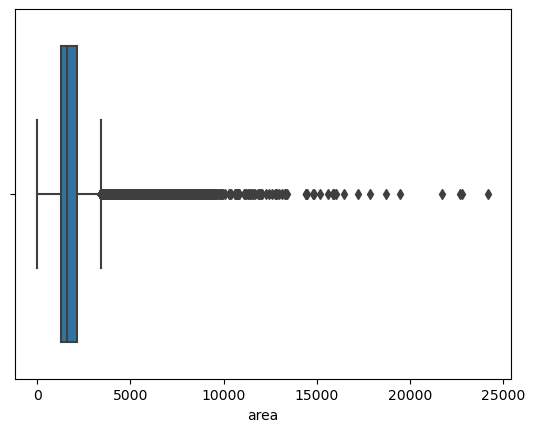

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: area, Length: 6639, dtype: int64

tax_value


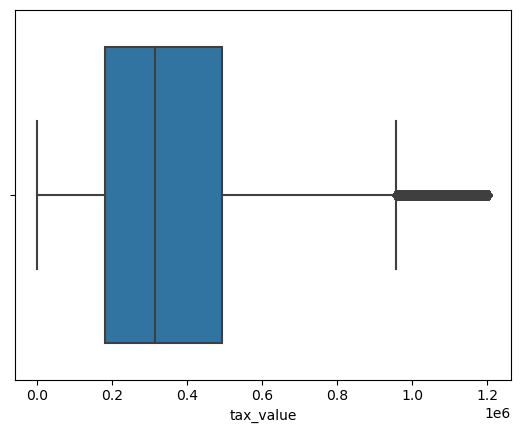

22         10
23          6
31          1
46          1
101         1
           ..
1202886     1
1202942     1
1202959     1
1202988     1
1202999     1
Name: tax_value, Length: 523005, dtype: int64

prop_tax


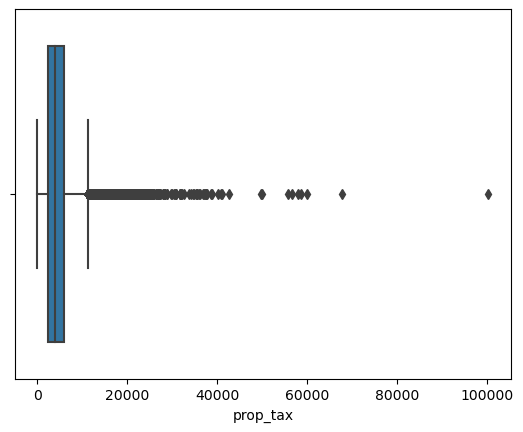

6.34         1
13.36        4
13.44        1
13.47        4
13.48        1
            ..
57963.32     1
58634.77     1
60110.79     1
67715.45     1
100379.34    1
Name: prop_tax, Length: 814643, dtype: int64



In [34]:
for col in df4.columns[:-1]:
    print(col)
    sns.boxplot(data=df4, x=col)
    plt.show()
    
    print(df4[col].value_counts().sort_index())
    print()